## AS04: Clusterização e Análise Textual

**Aluno: Vinícius Henrique Giovanini**  
**Matricula: 692225**  
**Professor: Wladmir Cardoso Brandão**  

### 1. Clusterização
Clusterizar o conjunto de dados 20 News Group DatasetLinks to an external site., vetorizando o dataset utilizando TF-IDF e Word2Vec, utilizando cada uma das abordagens abaixo:

In [1]:
# leitura do conjunto de dados 20 news group datasetlinks

from sklearn.datasets import fetch_20newsgroups
newsgroups = fetch_20newsgroups(subset='all')

# Pegando o target e o label abaixo

data = newsgroups.data
labels = newsgroups.target

In [2]:
data

["From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>\nSubject: Pens fans reactions\nOrganization: Post Office, Carnegie Mellon, Pittsburgh, PA\nLines: 12\nNNTP-Posting-Host: po4.andrew.cmu.edu\n\n\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n",
 'From: mblawson@midway.ecn.uoknor.edu (Matthew B Lawson)\nSubject: Which h

In [3]:
labels

array([10,  3, 17, ...,  3,  1,  7])

In [4]:
print(f'Numero de documentos: {len(data)}')
print(f'Numero de labels: {len(newsgroups.target_names)}')

Numero de documentos: 18846
Numero de labels: 20


### Função de plot

In [5]:
import matplotlib.pyplot as plt

def plot_clusters(X_2d, labels, title):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.colorbar(scatter)
    plt.show()

### Pre processamento dos dados

OBS: (Usei somente 2k de dados para o processo ficar mais rapido, estava rodando a 20 minutos o pre processamento com carga full)

In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

nltk.download('stopwords')
nltk.download('wordnet')
data_preprocessed = []
def preprocess(text):
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    
    tokens = text.split()
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stopwords.words('english')]
    
    return ' '.join(tokens)

for i, each_text in enumerate(data):
  if i < 2000:
    data_preprocessed.append(preprocess(each_text))
    print(i)
  else:
    break
  


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Viny\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Viny\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

### Vetorização usando o TF-IDF

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=1000) 
X_tfidf = tfidf_vectorizer.fit_transform(data_preprocessed)

print(X_tfidf.shape)

(2000, 1000)


### Vetorização usando Word2Vector

In [8]:
from gensim.models import Word2Vec
import numpy as np

sentences = [doc.split() for doc in data]
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)

def vectorize_doc(doc):
    words = doc.split()
    word_vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    return sum(word_vectors) / len(word_vectors) if word_vectors else np.zeros(100)

X_word2vec = np.array([vectorize_doc(doc) for doc in data_preprocessed])

print(X_word2vec.shape)


(2000, 100)


In [9]:
from sklearn.manifold import TSNE

tsne_tfidf = TSNE(n_components=2, random_state=42)
X_tfidf_2d = tsne_tfidf.fit_transform(X_tfidf.toarray())


tsne_word2vec = TSNE(n_components=2, random_state=42)
X_word2vec_2d = tsne_word2vec.fit_transform(X_word2vec)


### K-means(K=4)

In [10]:
from sklearn.cluster import KMeans

kmeans_tfidf = KMeans(n_clusters=4, random_state=42)
labels_kmeans_tfidf = kmeans_tfidf.fit_predict(X_tfidf)


kmeans_word2vec = KMeans(n_clusters=4, random_state=42)
labels_kmeans_word2vec = kmeans_word2vec.fit_predict(X_word2vec)

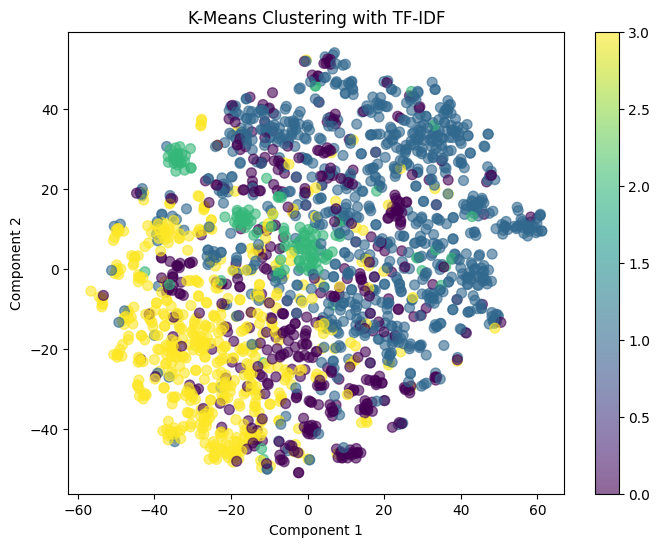

In [11]:
plot_clusters(X_tfidf_2d, labels_kmeans_tfidf, 'K-Means Clustering with TF-IDF')

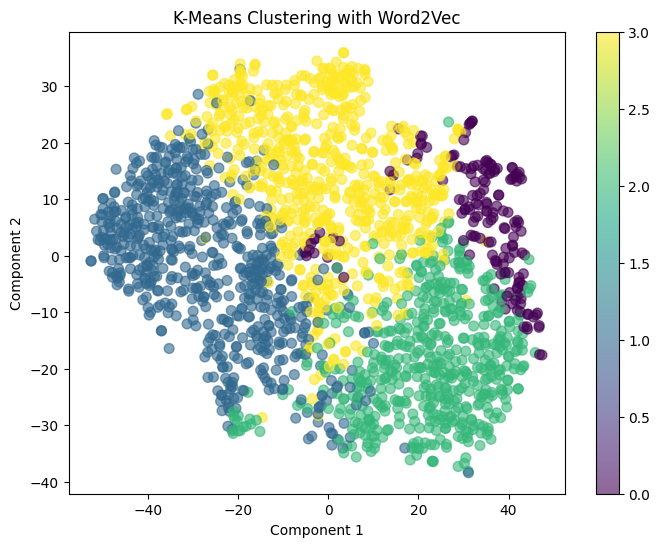

In [13]:
plot_clusters(X_word2vec_2d, labels_kmeans_word2vec, 'K-Means Clustering with Word2Vec')

### Spectral Clustering (k=6)

In [14]:
from sklearn.cluster import SpectralClustering

spectral_tfidf = SpectralClustering(n_clusters=6, affinity='nearest_neighbors', random_state=42)
labels_spectral_tfidf = spectral_tfidf.fit_predict(X_tfidf)

spectral_word2vec = SpectralClustering(n_clusters=6, affinity='nearest_neighbors', random_state=42)
labels_spectral_word2vec = spectral_word2vec.fit_predict(X_word2vec)

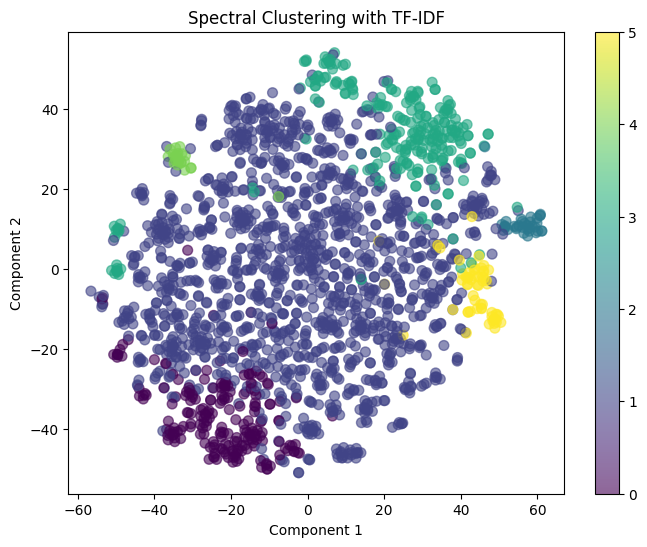

In [15]:
plot_clusters(X_tfidf_2d, labels_spectral_tfidf, 'Spectral Clustering with TF-IDF')

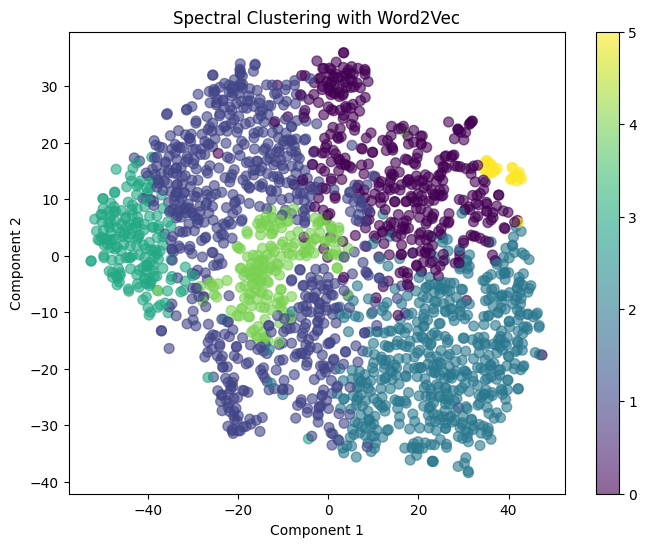

In [16]:
plot_clusters(X_word2vec_2d, labels_spectral_word2vec, 'Spectral Clustering with Word2Vec')

### Gaussian Mixture

In [17]:
from sklearn.mixture import GaussianMixture

gmm_tfidf = GaussianMixture(n_components=4, random_state=42)
labels_gmm_tfidf = gmm_tfidf.fit_predict(X_tfidf.toarray())

gmm_word2vec = GaussianMixture(n_components=4, random_state=42)
labels_gmm_word2vec = gmm_word2vec.fit_predict(X_word2vec)

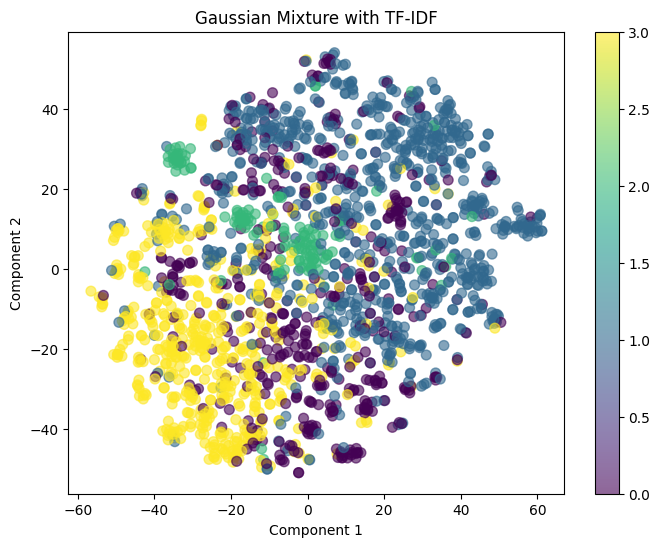

In [18]:
plot_clusters(X_tfidf_2d, labels_gmm_tfidf, 'Gaussian Mixture with TF-IDF')

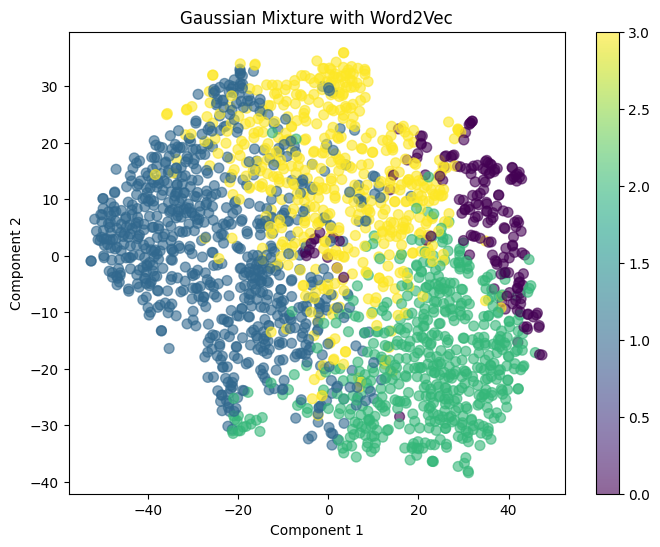

In [19]:
plot_clusters(X_word2vec_2d, labels_gmm_word2vec, 'Gaussian Mixture with Word2Vec')

### Agglomerative Clustering

In [20]:
from sklearn.cluster import AgglomerativeClustering

agglo_tfidf = AgglomerativeClustering(n_clusters=4)
labels_agglo_tfidf = agglo_tfidf.fit_predict(X_tfidf.toarray())

agglo_word2vec = AgglomerativeClustering(n_clusters=4)
labels_agglo_word2vec = agglo_word2vec.fit_predict(X_word2vec)

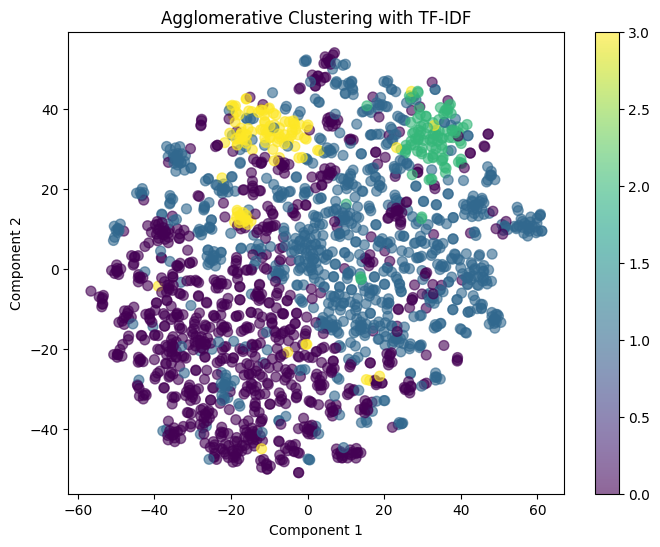

In [21]:
plot_clusters(X_tfidf_2d, labels_agglo_tfidf, 'Agglomerative Clustering with TF-IDF')

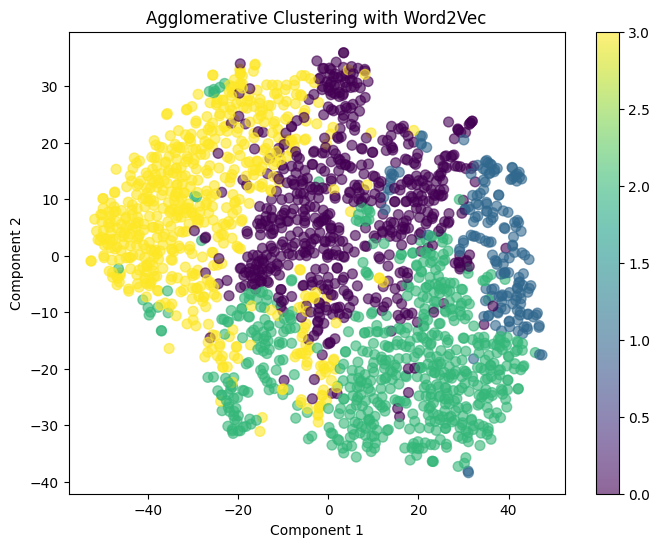

In [22]:
plot_clusters(X_word2vec_2d, labels_agglo_word2vec, 'Agglomerative Clustering with Word2Vec')

### DBSCAN

In [23]:
from sklearn.cluster import DBSCAN

dbscan_tfidf = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan_tfidf = dbscan_tfidf.fit_predict(X_tfidf)

dbscan_word2vec = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan_word2vec = dbscan_word2vec.fit_predict(X_word2vec)

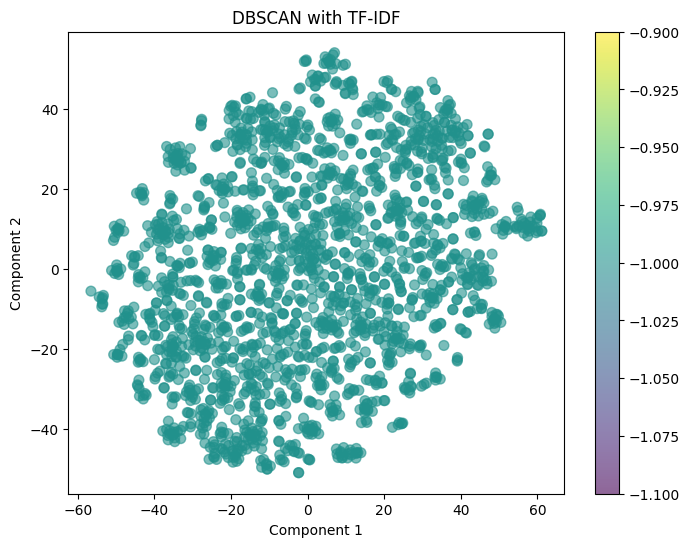

In [24]:
plot_clusters(X_tfidf_2d, labels_dbscan_tfidf, 'DBSCAN with TF-IDF')

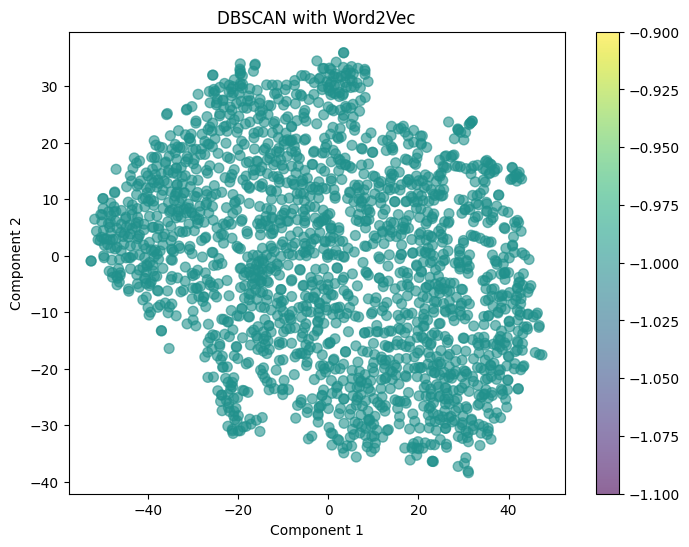

In [25]:
plot_clusters(X_word2vec_2d, labels_dbscan_word2vec, 'DBSCAN with Word2Vec')

### HDBSCAN

In [26]:
import hdbscan
hdbscan_tfidf = hdbscan.HDBSCAN(min_cluster_size=5)
labels_hdbscan_tfidf = hdbscan_tfidf.fit_predict(X_tfidf)

hdbscan_word2vec = hdbscan.HDBSCAN(min_cluster_size=5)
labels_hdbscan_word2vec = hdbscan_word2vec.fit_predict(X_word2vec)

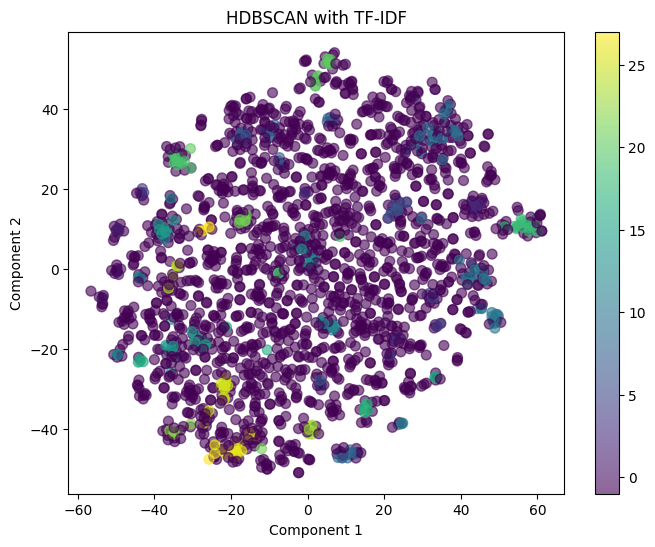

In [27]:
plot_clusters(X_tfidf_2d, labels_hdbscan_tfidf, 'HDBSCAN with TF-IDF')

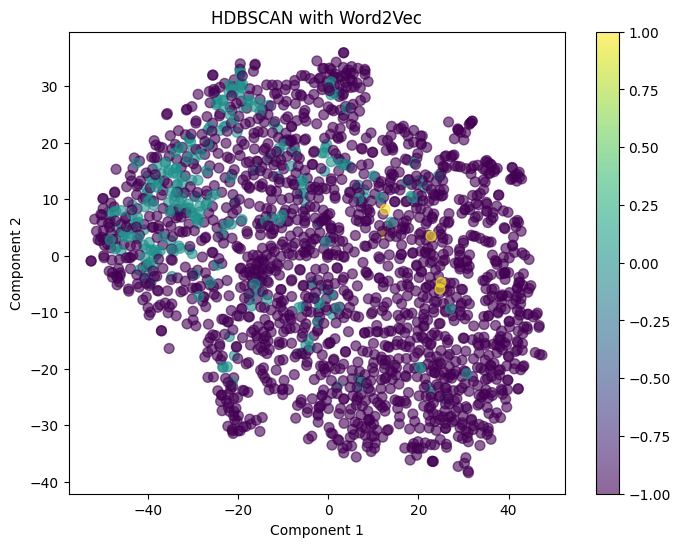

In [28]:
plot_clusters(X_word2vec_2d, labels_hdbscan_word2vec, 'HDBSCAN with Word2Vec')

### 2. Classificação

A partir do conjunto de dados Twitter US Airline SentimentLinks to an external site., também disponível na seção Arquivos no diretório datasets, implementar classificadores que, utilizando o texto do Tweet (vetorizado utilizando TF-IDF e Word2Vec), classifique o sentimento sobre Companias Aéreas em positivo, negativo ou neutro. 

In [29]:
import pandas as pd

In [87]:
# Importando o dataframe

data = pd.read_csv("../datasets/TwitterUSAirlineSentimet/Tweets.csv")

data.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence          airline  \
0            NaN                        NaN   Virgin America   
1            NaN                     0.0000   Virgin America   
2            NaN                        NaN   Virgin America   
3     Bad Flight                     0.7033   Virgin America   
4     Can't Tell                     1.0000  Vi/rgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

In [88]:
data = data[['airline_sentiment', 'text']]
data

airline_sentiment                                               text
0               neutral                @VirginAmerica What @dhepburn said.
1              positive  @VirginAmerica plus you've added commercials t...
2               neutral  @VirginAmerica I didn't today... Must mean I n...
3              negative  @VirginAmerica it's really aggressive to blast...
4              negative  @VirginAmerica and it's a really big bad thing...
...                 ...                                                ...
14635          positive  @AmericanAir thank you we got on a different f...
14636          negative  @AmericanAir leaving over 20 minutes Late Flig...
14637           neutral  @AmericanAir Please bring American Airlines to...
14638          negative  @AmericanAir you have my money, you change my ...
14639           neutral  @AmericanAir we have 8 ppl so we need 2 know h...

[14640 rows x 2 columns]

In [89]:
data['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

### Vetorização com TF-IDF

In [90]:
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(data['text'])
y = data['airline_sentiment']

### Vetorização com Word2Vector

In [91]:
from gensim.models import Word2Vec
import numpy as np

sentences = [tweet.split() for tweet in data['text']]
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)

def vectorize_text(text):
    words = text.split()
    word_vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(100)

X_word2vec = np.array([vectorize_text(tweet) for tweet in data['text']])


### Classificadores

#### Naive Bayes

In [40]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Dividindo em treino e teste

X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
X_train_word2vec, X_test_word2vec, _, _ = train_test_split(X_word2vec, y, test_size=0.2, random_state=42)


In [42]:
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)
print("Naive Bayes TF-IDF")
print(classification_report(y_test, y_pred_tfidf))

Naive Bayes TF-IDF
              precision    recall  f1-score   support

    negative       0.68      1.00      0.81      1889
     neutral       0.79      0.14      0.24       580
    positive       0.92      0.12      0.21       459

    accuracy                           0.69      2928
   macro avg       0.80      0.42      0.42      2928
weighted avg       0.74      0.69      0.60      2928



In [44]:
from sklearn.naive_bayes import GaussianNB

nb_word2vec = GaussianNB()
nb_word2vec.fit(X_train_word2vec, y_train)
y_pred_word2vec = nb_word2vec.predict(X_test_word2vec)
print("Naive Bayes Word2Vec")
print(classification_report(y_test, y_pred_word2vec))

Naive Bayes Word2Vec
              precision    recall  f1-score   support

    negative       0.75      0.73      0.74      1889
     neutral       0.36      0.23      0.28       580
    positive       0.31      0.49      0.38       459

    accuracy                           0.60      2928
   macro avg       0.48      0.49      0.47      2928
weighted avg       0.61      0.60      0.60      2928



#### Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier

dt_tfidf = DecisionTreeClassifier()
dt_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = dt_tfidf.predict(X_test_tfidf)
print("Decision Tree TF-IDF")
print(classification_report(y_test, y_pred_tfidf))

Decision Tree TF-IDF
              precision    recall  f1-score   support

    negative       0.79      0.80      0.80      1889
     neutral       0.44      0.45      0.44       580
    positive       0.52      0.49      0.51       459

    accuracy                           0.68      2928
   macro avg       0.59      0.58      0.58      2928
weighted avg       0.68      0.68      0.68      2928



In [46]:
dt_word2vec = DecisionTreeClassifier()
dt_word2vec.fit(X_train_word2vec, y_train)
y_pred_word2vec = dt_word2vec.predict(X_test_word2vec)
print("Decision Tree Word2Vec")
print(classification_report(y_test, y_pred_word2vec))

Decision Tree Word2Vec
              precision    recall  f1-score   support

    negative       0.74      0.69      0.71      1889
     neutral       0.31      0.36      0.33       580
    positive       0.30      0.32      0.31       459

    accuracy                           0.57      2928
   macro avg       0.45      0.46      0.45      2928
weighted avg       0.58      0.57      0.57      2928



#### SVM

In [47]:
from sklearn.svm import SVC

svm_tfidf = SVC()
svm_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = svm_tfidf.predict(X_test_tfidf)
print("SVM TF-IDF")
print(classification_report(y_test, y_pred_tfidf))

SVM TF-IDF
              precision    recall  f1-score   support

    negative       0.81      0.95      0.88      1889
     neutral       0.68      0.47      0.56       580
    positive       0.84      0.59      0.69       459

    accuracy                           0.80      2928
   macro avg       0.78      0.67      0.71      2928
weighted avg       0.79      0.80      0.78      2928



In [48]:
svm_word2vec = SVC()
svm_word2vec.fit(X_train_word2vec, y_train)
y_pred_word2vec = svm_word2vec.predict(X_test_word2vec)
print("SVM Word2Vec")
print(classification_report(y_test, y_pred_word2vec))

SVM Word2Vec
              precision    recall  f1-score   support

    negative       0.67      0.99      0.80      1889
     neutral       0.63      0.09      0.16       580
    positive       0.85      0.11      0.20       459

    accuracy                           0.67      2928
   macro avg       0.72      0.40      0.39      2928
weighted avg       0.69      0.67      0.58      2928



#### Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression

lr_tfidf = LogisticRegression(max_iter=200)
lr_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = lr_tfidf.predict(X_test_tfidf)
print("Logistic Regression TF-IDF")
print(classification_report(y_test, y_pred_tfidf))

Logistic Regression TF-IDF
              precision    recall  f1-score   support

    negative       0.83      0.94      0.88      1889
     neutral       0.67      0.52      0.59       580
    positive       0.82      0.60      0.69       459

    accuracy                           0.80      2928
   macro avg       0.77      0.69      0.72      2928
weighted avg       0.80      0.80      0.79      2928



In [50]:
lr_word2vec = LogisticRegression(max_iter=200)
lr_word2vec.fit(X_train_word2vec, y_train)
y_pred_word2vec = lr_word2vec.predict(X_test_word2vec)
print("Logistic Regression Word2Vec")
print(classification_report(y_test, y_pred_word2vec))

Logistic Regression Word2Vec
              precision    recall  f1-score   support

    negative       0.73      0.95      0.83      1889
     neutral       0.53      0.25      0.34       580
    positive       0.72      0.29      0.41       459

    accuracy                           0.71      2928
   macro avg       0.66      0.50      0.53      2928
weighted avg       0.69      0.71      0.67      2928



d:\AREA_DE_TRABALHO\Faculdade_7_Periodo\Text-Mining\text-mining-analysis\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

rf_tfidf = RandomForestClassifier()
rf_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = rf_tfidf.predict(X_test_tfidf)
print("Random Forest TF-IDF")
print(classification_report(y_test, y_pred_tfidf))

Random Forest TF-IDF
              precision    recall  f1-score   support

    negative       0.76      0.96      0.85      1889
     neutral       0.66      0.37      0.47       580
    positive       0.84      0.41      0.55       459

    accuracy                           0.76      2928
   macro avg       0.75      0.58      0.62      2928
weighted avg       0.76      0.76      0.73      2928



In [55]:
rf_word2vec = RandomForestClassifier()
rf_word2vec.fit(X_train_word2vec, y_train)
y_pred_word2vec = rf_word2vec.predict(X_test_word2vec)
print("Random Forest Word2Vec")
print(classification_report(y_test, y_pred_word2vec))

Random Forest Word2Vec
              precision    recall  f1-score   support

    negative       0.73      0.94      0.82      1889
     neutral       0.54      0.28      0.37       580
    positive       0.64      0.29      0.40       459

    accuracy                           0.71      2928
   macro avg       0.64      0.50      0.53      2928
weighted avg       0.68      0.71      0.67      2928



#### XGBoost

(OBS): Tive que realizar o mapeamento do colun airline_sentiment, pois verifiquei e a função não aceita classes de string, somente numero, então o negative ficou 0, neutral 1, e positive 2.

In [95]:
new_data = data.copy()
class_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
new_data['airline_sentiment'] = new_data['airline_sentiment'].map(class_mapping)
y_new = new_data['airline_sentiment']

y_new

0        1
1        2
2        1
3        0
4        0
        ..
14635    2
14636    0
14637    1
14638    0
14639    1
Name: airline_sentiment, Length: 14640, dtype: int64

In [97]:
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y_new, test_size=0.2, random_state=42)
X_train_word2vec, X_test_word2vec, _, _ = train_test_split(X_word2vec, y_new, test_size=0.2, random_state=42)

In [98]:
from xgboost import XGBClassifier


xgb_tfidf = XGBClassifier()
xgb_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = xgb_tfidf.predict(X_test_tfidf)
print("XGBoost TF-IDF")
print(classification_report(y_test, y_pred_tfidf))

print(X_train_tfidf)



XGBoost TF-IDF
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1889
           1       0.62      0.51      0.56       580
           2       0.79      0.61      0.69       459

    accuracy                           0.79      2928
   macro avg       0.75      0.68      0.71      2928
weighted avg       0.78      0.79      0.78      2928

  (0, 11535)	0.4760124058749253
  (0, 9765)	0.42419976684270383
  (0, 801)	0.4713124117987087
  (0, 13914)	0.13665092062537992
  (0, 10222)	0.2906378263624814
  (0, 14049)	0.24279025308533558
  (0, 5745)	0.3521036847752466
  (0, 2450)	0.21423230956427308
  (0, 6157)	0.14106179007313244
  (0, 14944)	0.1395332025804158
  (1, 7809)	0.3992696613784286
  (1, 11891)	0.2947556934873803
  (1, 4777)	0.29032428132492105
  (1, 5355)	0.21675378422952385
  (1, 12495)	0.22545887110556087
  (1, 7832)	0.22305481595552884
  (1, 4882)	0.3216350864620465
  (1, 7804)	0.24192730098257717
  (1, 14681)	0.139196276700257

In [99]:
xgb_word2vec = XGBClassifier()
xgb_word2vec.fit(X_train_word2vec, y_train)
y_pred_word2vec = xgb_word2vec.predict(X_test_word2vec)
print("XGBoost Word2Vec")
print(classification_report(y_test, y_pred_word2vec))

XGBoost Word2Vec
              precision    recall  f1-score   support

           0       0.74      0.91      0.82      1889
           1       0.51      0.32      0.39       580
           2       0.60      0.34      0.43       459

    accuracy                           0.70      2928
   macro avg       0.62      0.52      0.55      2928
weighted avg       0.68      0.70      0.67      2928

